## <p style="text-align: right;"> &#9989; Put your name here</p>
#### <p style="text-align: right;"> &#9989; Put your group member names here</p>

# Day 14 In-Class Assignment: Monte Carlo Integration with Python scripts

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/Darts_in_a_dartboard.jpg/1200px-Darts_in_a_dartboard.jpg" width=400px>

### Learning goals:

By the end of this assignment, you should be able to:

* Explain why "random" numbers from random number generators aren't truly random
* Compute the area inside a region using Monte Carlo integration
* Write and run Python scripts on the command line.

---
# Just how random are "random numbers"?

There are many real world scenarios in which generating random numbers can be extremely useful, e.g. gambling and cryptography. Random numbers are also commonly used in computational modeling and data science. However, getting a computer to generate a truly random number is not a trivial task.

Computers are, by their nature, very deterministic devices. If I know the state of my device at a given point in time, it's possible to predict all future states. As a result, when computers generate random numbers, they're actually only generating pseudo random numbers. Starting with some initial value, normally called the seed, the computer uses an algorithm to create a sequence of seemingly random numbers. In reality, the sequence will eventually repeat. This is true of all pseudorandom number generators, but not all random number generators are created equal. Better random number generators have higher periodicity, meaning that you can generate more random numbers before the sequence repeats itself. 

Here is a very simply example of an algorithm for producing a random number:

$$I_{j+1} = (11371~I_{j} + 4132)~\mathrm{mod}~4096$$

where "mod" is the modulus operator. This algorithm will produce a random number in the range of 0 to 4096. That's not a particularly large range if we want to be able to generate *a lot* of random numbers.

**Take a look**: The code provided below generates 8192 "random" numbers using the example algorithm. We see that the sequence repeats itself pretty quickly for the given seed. Try out other seeds to see how the result changes.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Random number generator
# seed : the initial seed for the RNG
# n : the number of "random" numbers desired
def rando(seed, n):
    nums = np.zeros(n)
    nums[0] = seed
    for i in range(n-1):
        nums[i+1] = (11371 * nums[i] + 4132) % 4096
    return nums

# Initialize array using our random number generator
random_numbers = rando(45, 8192)

# note that for this seed it repeats every 1024 numbers, but what if the initial seed is an even number?
print(random_numbers[:1024] - random_numbers[1024:2048]) 

# What range of numbers did we end up with?
print(max(random_numbers))
print(min(random_numbers))

# How many unique numbers are there?
print(len(list(set(random_numbers))))

[0. 0. 0. ... 0. 0. 0.]
4093.0
3.0
1024


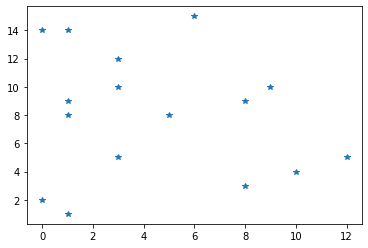

In [24]:
import numpy as np
from random import seed
from random import randint
# seed random number generator
seed(1)
# generate some integers
x=np.random.randint(0,16,size=16)
y=np.random.randint(0,16,size=16)
cir_x=range(1)
plt.plot(x,y,'*')

Clearly, if you were to rely on a number generator like that one and you were doing anything sufficiently complex or sizable, you probably wouldn't get very high quality results. (and let's be clear, *never* use this random number generator outside of this in-class activity). Luckily there are people who have worked to create really good random number generators and many open source packages make use of these ones. For example, both Python and Numpy's "random" modules make use of the Mersenne Twister (https://en.wikipedia.org/wiki/Mersenne_Twister), which has a very high periodicity and is one of the most commonly used random number generators. When doing work in computational and data science, it is important that you trust your random number generator and you're aware of any shortcomings! 

-----
# Monte Carlo Integration

While there are many uses of random number generators, including some that might come up later on in this class, we're going to look at a relatively straight forward application today, Monte Carlo integration. While coding up this solution, you'll also practice writing and running a Python script!

The basic idea is pretty simple. You have some function, say $f(\vec{x})$, and you want to know the area (2D) or volume (3D) enclosed by the function. Using Monte Carlo integration, you draw a bounding box around the area/volume of interest and then randomly scatter points throughout that region -- similar to throwing darts randomly at a dart board. This might produce a result that looks something like this:

<img src="http://xaktly.com/Images/Mathematics/NumericalIntegration/MonteCarloIntegrationSchematic.png" width=250px>

where the colored points are the ones inside the region of interest.

Once you've done this, you can compute the area or volume enclose by the function by looking at how many points ended up inside that area or volume. For area, this calculation would look something like this:

$$A_{\mathrm{enclosed}} \approx A_{\mathrm{bounding\ box}} \times \frac{\mathrm{points\ enclosed}}{\mathrm{all\ points\ inside\ the\ bounding\ box}}$$

where "$A$" is the area. The same relationship would apply in three dimensions.

If we compare this to how we'd normally use calculus to compute the area, we'd use an integral of the form: 

$$\int_{}^{} f(\vec{x}) dA$$

where we integrate over the enclosed region.

In the case of our Monte Carlo integration, we can think of $dA$ as being some finite area $\Delta A$, which is related to the total number of random points we use in the following way:

$$\Delta A \sim A_{\mathrm{bounding\ box}}/N_{\mathrm{points}}$$

where $N_{\mathrm{points}}$ is *all* of the points, not just those within the enclosed region. Given this, we should expect that as we increase the total number of points we use, we should begin to approach the real value of the integral.

## Assigned Task:

Use the Monte Carlo integration method to **write a Python script** that can be run on the command line to compute the area of a 2D donut that looks like this:

<img src="https://i.imgur.com/d3CgKtO.png" width=300px>

Assume that the outer radius is one unit radius, $r=1$, and the inner radius is half of that, $r=0.5$. Start with $N_{\mathrm{points}}=16$, and then see how your answer changes as you successively double the number of points you use. You should determine how accurate your answer is by computating a fractional error for you solution of the form:

$$E = \frac{\lvert A_{\mathrm{computed}} - A_{\mathrm{real}}\rvert}{A_{\mathrm{real}}}$$

Remember that the area of a circle is $\pi~r^2$. Also, when generating your random numbers, it is recommended that you use the `np.random.uniform()` function.

**To start**, write your script so that it prints out the estimate area, the exact area, and the error just for the case of $N_{\mathrm{points}}=16$.

Time permitting, **plot this error value as a function of the number of points you use**. How does the error between your estimated solution and the analytic solution decrease as a function of the number of points used, $N_{\mathrm{points}}$? You'll want to make sure you **save your plot** once you create it so that you can take a look at it after your script runs.

**While debugging**, you'll probably want to think about how you can use print statements to understand what you code is going and where since writing and testing a script is a bit different than using a Jupyter notebook.

**If you have time**: Try using the simple random number generator we created earlier in the assignment to compute the area. What happens as the number of points get large?

---

In [ ]:
[]

---------
### Congratulations, you're done with your in-class assignment!

Now, you just need to submit this assignment by uploading it, along with your Python script, to the course Desire2Learn web page (Don't forget to add your name in the first cell of the notebook).

&#169; Copyright 2019,  Michigan State University Board of Trustees